In [1]:
import pandas as pd
import os
import cv2
import csv
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import h5py
from torchvision import transforms
import tensorflow as tf

In [2]:
def imageGenerator():
    input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\data'
    output_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data'
    datas = []
    img_size = (256,256)
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.mat'):
            file_path = os.path.join(input_folder,file_name)
            
            with h5py.File(file_path, 'r') as f:
                image = np.array(f['cjdata/image']).T
                label = int(np.array(f['cjdata/label'])[0,0])
                tumor_border = np.array(f['cjdata/tumorBorder']).T
                tumor_mask = np.array(f['cjdata/tumorMask']).T
    
            image = image.astype(np.float64)
            im_norm = 255*(image-image.min())/(image.max()-image.min())
            im_uint8 = im_norm.astype(np.uint8)
            im_pil = Image.fromarray(im_uint8)
            im_pil = im_pil.resize(img_size)
            
            datas.append((np.array(im_pil,dtype=np.float32),label))

    return datas

In [3]:
try:
    datas = imageGenerator()
except ValueError:
    print('Hibás érték')

In [4]:
labels = ['meningioma', 'glioma', 'pituitary tumor']

In [5]:
X = [item[0] for item in datas]
y = [item[1] for item in datas] 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
'''
model = models.Sequential()
model.add(layers.Input(shape=(256, 256, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(labels),activation='softmax')) # Többosztályos osztályozás (pl. glioma, meningeoma, stb.)


Pontosság: 0.8725296442687747

Részletes riport:
               precision    recall  f1-score   support

         1.0       0.84      0.66      0.74       251
         2.0       0.86      0.94      0.90       446
         3.0       0.92      0.94      0.93       315

    accuracy                           0.87      1012
   macro avg       0.87      0.85      0.86      1012
weighted avg       0.87      0.87      0.87      1012
-----------------------------------------------------------
Pontosság: 0.9130434782608695

Részletes riport:
               precision    recall  f1-score   support

         1.0       0.81      0.88      0.84       251
         2.0       0.94      0.88      0.91       446
         3.0       0.97      0.98      0.97       315

    accuracy                           0.91      1012
   macro avg       0.91      0.92      0.91      1012
weighted avg       0.92      0.91      0.91      1012
'''

"\nmodel = models.Sequential()\nmodel.add(layers.Input(shape=(256, 256, 1)))\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.Flatten())\n#model.add(layers.Dense(64, activation='relu'))\nmodel.add(layers.Dense(len(labels),activation='softmax')) # Többosztályos osztályozás (pl. glioma, meningeoma, stb.)\n\n\nPontosság: 0.8725296442687747\n\nRészletes riport:\n               precision    recall  f1-score   support\n\n         1.0       0.84      0.66      0.74       251\n         2.0       0.86      0.94      0.90       446\n         3.0       0.92      0.94      0.93       315\n\n    accuracy                           0.87      1012\n   macro avg       0.87      0.85      0.86      1012\nweighted avg       0.87      0.87      0.87      1012\n-----------------------------

In [22]:
model = models.Sequential()
model.add(layers.Input(shape=(256, 256, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(len(labels)+1,activation='softmax')) # Többosztályos osztályozás (pl. glioma, meningeoma, stb.)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         460,804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474,852 (1.81 MB)

 Trainable params: 474,852 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
X_train = np.array(X_train,dtype=np.float32)
X_test = np.array(X_test,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [28]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test,y_test))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.6217 - loss: 16.6748 - val_accuracy: 0.7717 - val_loss: 0.5089
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.8937 - loss: 0.2514 - val_accuracy: 0.8933 - val_loss: 0.2527
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.9783 - loss: 0.0679 - val_accuracy: 0.8626 - val_loss: 0.3537
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9180 - val_loss: 0.2523
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9200 - val_loss: 0.2748
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9180 - val_loss: 0.2955
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 1.0000 - loss: 7.1111e-04 - val_accuracy: 0.9150 - val_loss: 0.3180
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 1.0000 - loss: 3.7422e-04 - val_ac

In [29]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Pontosság kiírása
from sklearn.metrics import accuracy_score, classification_report

print("Pontosság:", accuracy_score(y_test, predicted_classes))
print("\nRészletes riport:\n", classification_report(y_test, predicted_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
Pontosság: 0.9140316205533597

Részletes riport:
               precision    recall  f1-score   support

         1.0       0.88      0.78      0.83       251
         2.0       0.89      0.95      0.92       446
         3.0       0.97      0.97      0.97       315

    accuracy                           0.91      1012
   macro avg       0.91      0.90      0.91      1012
weighted avg       0.91      0.91      0.91      1012



In [30]:
import joblib as jl
jl.dump(model,'web/backend/models/BrainTumorClassificationModel.pkl')
jl.dump(history,'web/backend/models/BrainTumorClassificationHistory.pkl')

['web/backend/models/BrainTumorClassificationHistory.pkl']

In [31]:
accuracy_score(y_test, predicted_classes)

0.9140316205533597

In [32]:
# 1. Pontosság (Accuracy)
accuracy_score(y_test, predicted_classes)

0.9140316205533597

In [33]:
# 2. Precision, Recall, F1-score
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

         1.0       0.88      0.78      0.83       251
         2.0       0.89      0.95      0.92       446
         3.0       0.97      0.97      0.97       315

    accuracy                           0.91      1012
   macro avg       0.91      0.90      0.91      1012
weighted avg       0.91      0.91      0.91      1012



In [34]:
# 3. Confusion Matrix

#confusion_matrix = metrics.confusion_matrix(actual, predicted)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])


In [35]:
# 4. ROC-AUC (Receiver Operating Characteristic - Area Under Curve) ------ nem releváns

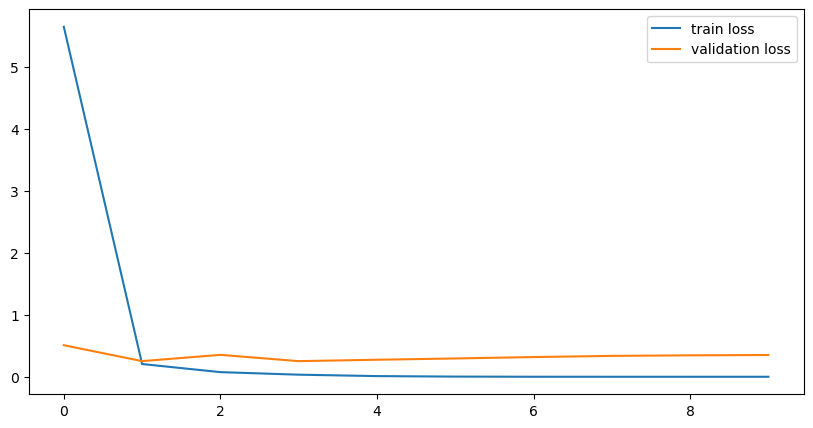

In [36]:
# 5. Loss (veszteség) érték
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [37]:
history.history['loss']

[5.642703056335449,
 0.2057124525308609,
 0.07508990168571472,
 0.03402566537261009,
 0.011171416379511356,
 0.0031440588645637035,
 0.0006809482001699507,
 0.00038738150033168495,
 0.0002831626043189317,
 0.0002165990008506924]

In [38]:
history.history['val_loss']

[0.5088976621627808,
 0.25269582867622375,
 0.35365909337997437,
 0.2522735595703125,
 0.27484583854675293,
 0.2954610288143158,
 0.31797224283218384,
 0.33711478114128113,
 0.34592413902282715,
 0.3513498902320862]

In [39]:
# 6. Tanulási görbe

In [40]:
# 7. Modelméret ------ nem releváns

In [41]:
# 8. Inference sebesség / Latencia ------ nem releváns

In [42]:
# 9. Train Time (Tanítási idő)

In [43]:
# 10. Generalizációs képesség ------- nem tudom 

In [44]:
print(len(y_test))

1012


In [45]:
with open('web/backend/brainTumor_y_test.npy', 'w') as filehandle:  
    filehandle.writelines("%s\n" % x for x in y_test)

In [46]:
y_test = []
with open('web/backend/brainTumor_y_test.txt', 'r') as filehandle: 
    content = filehandle.readlines()
    for data in content:
        y_test.append(data[:-1])

In [47]:
#y_test

In [48]:
with open('web/backend/brainTumor_X_test.npy', 'w') as filehandle:  
    filehandle.writelines("%s\n" % x for x in X_test)

In [49]:
np.save('web/backend/brainTumor_y_test.npy',y_test)
np.save('web/backend/brainTumor_X_test.npy',X_test)

In [50]:
np.array(history.history['loss']).sum()/len(np.array(history.history['loss']))

0.5973414642474382